In [1]:
# importing modules
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score
from sklearn.model_selection import validation_curve

In [2]:
# loading the mat file
XR = loadmat('annualrainfall.mat')

In [3]:
XR = XR["XR"]

In [4]:
XR.shape

(357, 118)

In [5]:
# conversion into dataframe for ease in visualisation
df = pd.DataFrame(XR.T)

In [6]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,347,348,349,350,351,352,353,354,355,356
0,0.719022,0.799972,1.116379,0.764488,0.923383,0.961330,0.558784,1.043538,2.035055,2.412407,...,13.020404,12.291794,12.565416,12.688719,12.852414,11.667012,12.174392,12.512038,10.399852,11.287784
1,2.572195,2.358573,3.817571,2.544322,1.777028,1.908791,0.716344,3.693454,6.151360,4.426207,...,11.486169,10.682952,10.680328,10.680328,11.080315,10.112830,10.391051,10.737137,9.187904,9.791919
2,5.115582,4.459389,5.715812,5.017730,3.644102,3.152490,1.511983,5.075399,7.259941,4.552429,...,9.685181,9.213934,9.213934,9.213934,9.445984,8.772028,8.985728,9.214482,8.054785,8.523733
3,0.509786,0.649587,1.357004,0.584740,0.878721,0.927881,0.002060,1.601084,2.431932,2.139452,...,10.281640,9.984426,9.984426,9.977869,10.129921,9.474487,9.726133,9.926839,8.654893,9.182062
4,0.600234,1.078375,1.584306,0.753628,1.811034,2.033962,0.332660,1.851805,3.144972,3.733844,...,11.919070,11.156557,11.156557,11.156557,11.543451,10.539118,10.844063,11.189535,9.524974,10.185022


In [7]:
# Question 1 
year_totals = np.sum(df,axis=1)
print("Total over all locations per year\n")
print(year_totals)

Total over all locations per year

0      2419.465229
1      2512.018018
2      2667.357994
3      2327.246610
4      2306.637001
          ...     
113    2320.219852
114    2307.336725
115    2568.183404
116    2575.166233
117    2379.061657
Length: 118, dtype: float64


In [8]:
# Question 1
mean = np.mean(year_totals)
stdev = np.std(year_totals)
print("Mean :",mean)
print("Standard Deviation: ",stdev)

Mean : 2731.5638988707724
Standard Deviation:  266.89890593445193


In [9]:
# Question 2
label = np.where(year_totals>mean+stdev,1,0)
label = np.where(year_totals<mean-stdev,-1,label)
label = label.reshape((-1,1))

In [10]:
# labels are added to the dataframe
df['label'] = label

In [11]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,348,349,350,351,352,353,354,355,356,label
0,0.719022,0.799972,1.116379,0.764488,0.923383,0.961330,0.558784,1.043538,2.035055,2.412407,...,12.291794,12.565416,12.688719,12.852414,11.667012,12.174392,12.512038,10.399852,11.287784,-1
1,2.572195,2.358573,3.817571,2.544322,1.777028,1.908791,0.716344,3.693454,6.151360,4.426207,...,10.682952,10.680328,10.680328,11.080315,10.112830,10.391051,10.737137,9.187904,9.791919,0
2,5.115582,4.459389,5.715812,5.017730,3.644102,3.152490,1.511983,5.075399,7.259941,4.552429,...,9.213934,9.213934,9.213934,9.445984,8.772028,8.985728,9.214482,8.054785,8.523733,0
3,0.509786,0.649587,1.357004,0.584740,0.878721,0.927881,0.002060,1.601084,2.431932,2.139452,...,9.984426,9.984426,9.977869,10.129921,9.474487,9.726133,9.926839,8.654893,9.182062,-1
4,0.600234,1.078375,1.584306,0.753628,1.811034,2.033962,0.332660,1.851805,3.144972,3.733844,...,11.156557,11.156557,11.156557,11.543451,10.539118,10.844063,11.189535,9.524974,10.185022,-1


In [12]:
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

In [13]:
# preparing the train and test sets using 100 years for train only
X_train = X.iloc[0:100,:]
X_test = X.iloc[100:,:]

Y_train = Y.iloc[0:100]
Y_test = Y.iloc[100:]

print("X_train shape: ",X_train.shape)
print("X_test shape: ",X_test.shape)

X_train shape:  (100, 357)
X_test shape:  (18, 357)


In [14]:
# Question 3 
# Training the decision tree with 5-fold cross validation
clf = DecisionTreeClassifier(max_depth=10,random_state=0)
scores = cross_validate(estimator = clf, X = X_train,y= Y_train, cv=5,return_estimator=True)
clf = clf.fit(X_train, Y_train)

In [15]:
train_error = []
test_error = []
for i in range(5):
    train_outputs = scores["estimator"][i].predict(X_train)
    preds = scores["estimator"][i].predict(X_test)
    train_error.append(1-accuracy_score(y_true = Y_train,y_pred = train_outputs))
    test_error.append(1-accuracy_score(y_true = Y_test,y_pred = preds))

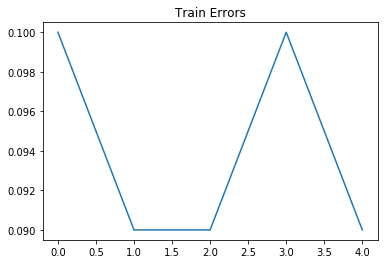

In [16]:
plt.plot(train_error)
plt.title("Train Errors")
plt.show()

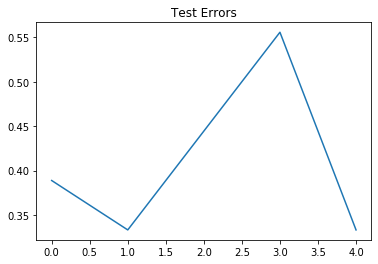

In [17]:
plt.plot(test_error)
plt.title("Test Errors")
plt.show()

In [18]:
# Question 4
# Training the random forest with 5-fold cross validation
# Both train and test errors are seen improving
rfclf = RandomForestClassifier(max_depth=10,random_state=0)
scores = cross_validate(rfclf, X_train, Y_train, cv=5,return_estimator=True)
rfclf = rfclf.fit(X_train, Y_train)

In [19]:
train_error = []
test_error = []
for i in range(5):
    train_outputs = scores["estimator"][i].predict(X_train)
    preds = scores["estimator"][i].predict(X_test)
    train_error.append(1-accuracy_score(y_true = Y_train,y_pred = train_outputs))
    test_error.append(1-accuracy_score(y_true = Y_test,y_pred = preds))

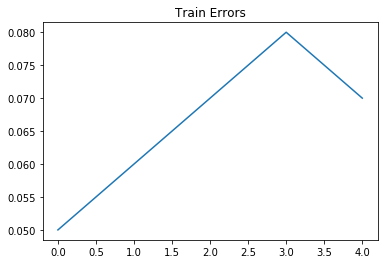

In [20]:
plt.plot(train_error)
plt.title("Train Errors")
plt.show()

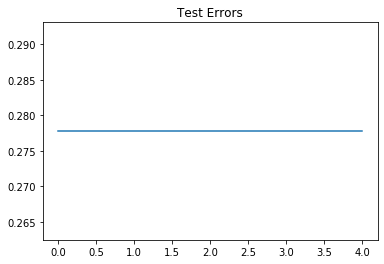

In [21]:
plt.plot(test_error)
plt.title("Test Errors")
plt.show()

In [22]:
# Question 5
location_means = np.mean(df.iloc[:,:-1],axis=0)
print("Mean Rainfall for locations\n")
print(location_means)
location_std = np.std(df.iloc[:,:-1],axis=0)
print("\nStd-dev of Rainfall for locations\n")
print(location_std)

Mean Rainfall for locations

0       2.879478
1       2.798381
2       4.678337
3       3.253128
4       2.866147
         ...    
352    18.762887
353    19.357414
354    19.317927
355    18.627022
356    19.065612
Length: 357, dtype: float64

Std-dev of Rainfall for locations

0       2.035299
1       2.003111
2       2.328049
3       1.931908
4       1.703730
         ...    
352     7.968767
353     8.606350
354     9.835775
355     9.662201
356    10.064099
Length: 357, dtype: float64


In [23]:
# Question 5
labels = np.empty((df.shape[0],df.shape[1]-1))
for i in range(labels.shape[0]):
    for j in range(labels.shape[1]):
        if(df.iloc[i,j] > location_means[j]+location_std[j]):
            labels[i,j]=1
        elif(df.iloc[i,j] < location_means[j]-location_std[j]):
            labels[i,j]=-1
        else:
            labels[i,j]=0
        

In [24]:
labels.shape

(118, 357)

In [25]:
# Creating the new dataset 
new_X = []
new_Y = []
for i in range(labels.shape[0]):
    for j in range(labels.shape[1]):
        X_row = []
        for k in range(labels.shape[1]):
            if(k!=j):
                X_row.append(df.iloc[i,k])
        new_X.append(X_row)
        new_Y.append(labels[i,j])

In [26]:
new_X = []
new_Y = []
for i in range(labels.shape[0]):
    for j in range(labels.shape[1]):
        X_row = []
        for k in range(labels.shape[1]):
            if(k!=j):
                X_row.append(df.iloc[i,k])
        new_X.append(X_row)
        new_Y.append(labels[i,j])

In [27]:
new_X = np.array(new_X)
new_Y = np.array(new_Y)

In [28]:
new_X.shape

(42126, 356)

In [29]:
new_Y.shape

(42126,)

In [30]:
# preparing the train and test splits from new dataset
# train set contains data rows derived from the first 100 years only
new_X_train = new_X[:-6426,:]
new_X_test = new_X[-6426:,:]
new_Y_train = new_Y[:-6426]
new_Y_test = new_Y[-6426:]

In [31]:
# Question 6 
# Training the decision tree with 5-fold cross validation
clf = DecisionTreeClassifier(max_depth=10,random_state=0)
scores = cross_validate(estimator = clf, X = new_X_train,y= new_Y_train, cv=5,return_estimator=True)
clf = clf.fit(new_X_train, new_Y_train)

In [32]:
feat_importance = clf.tree_.compute_feature_importances()
top_idx = np.argsort(feat_importance)[:-10:-1]

In [33]:
train_error = []
test_error = []
for i in range(5):
    train_outputs = scores["estimator"][i].predict(new_X_train)
    preds = scores["estimator"][i].predict(new_X_test)
    train_error.append(1-accuracy_score(y_true = new_Y_train,y_pred = train_outputs))
    test_error.append(1-accuracy_score(y_true = new_Y_test,y_pred = preds))

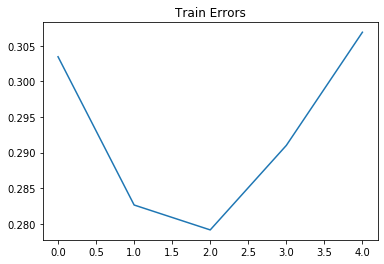

In [34]:
plt.plot(train_error)
plt.title("Train Errors")
plt.show()

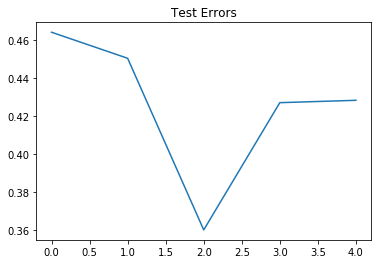

In [35]:
plt.plot(test_error)
plt.title("Test Errors")
plt.show()

In [36]:
# Question 7
# Training the random forest with 5-fold cross validation
# Both train and test errors are seen improving
rfclf = RandomForestClassifier(max_depth=10,random_state=0)
scores = cross_validate(rfclf, new_X_train, new_Y_train, cv=5,return_estimator=True)
rfclf = rfclf.fit(new_X_train, new_Y_train)

In [37]:
train_error = []
test_error = []
for i in range(5):
    train_outputs = scores["estimator"][i].predict(new_X_train)
    preds = scores["estimator"][i].predict(new_X_test)
    train_error.append(1-accuracy_score(y_true = new_Y_train,y_pred = train_outputs))
    test_error.append(1-accuracy_score(y_true = new_Y_test,y_pred = preds))

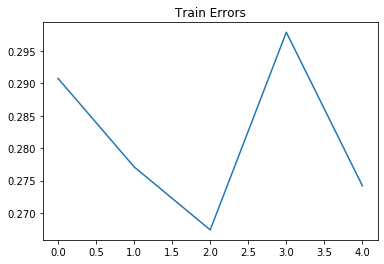

In [38]:
plt.plot(train_error)
plt.title("Train Errors")
plt.show()

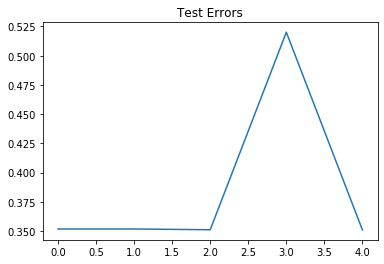

In [39]:
plt.plot(test_error)
plt.title("Test Errors")
plt.show()